In [10]:
import _init_paths
import sys
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import numpy as np
import skimage.io as io
import pylab
dataDir='../data/coco'
dataType='val2014'
annFile = '%s/annotations/instances_%s.json'%(dataDir,dataType)
cocoGt=COCO(annFile)
imgIds=sorted(cocoGt.getImgIds())
imgIds=imgIds[0:100]
imgId = imgIds[np.random.randint(100)]
img = cocoGt.loadImgs(imgId)[0]
I = io.imread('%s/images/val2014/%s'%(dataDir,img['file_name']))

loading annotations into memory...
Done (t=10.48s)
creating index...
index created!


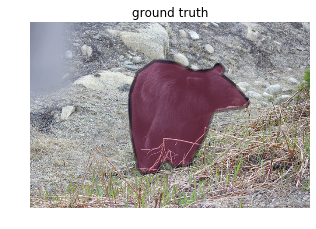

In [14]:
fig = plt.figure(figsize=[5,5])
plt.imshow(I); plt.axis('off'); plt.title('ground truth')
annIds = cocoGt.getAnnIds(imgIds=imgId)
anns = cocoGt.loadAnns(annIds)
cocoGt.showAnns(anns)
plt.show()

In [48]:
import pycocotools.mask as mask
a=mask.frPyObjects(anns[0]['segmentation'], img['height'], img['width'])
a=mask.decode(a)
a.shape

(427, 640, 1)

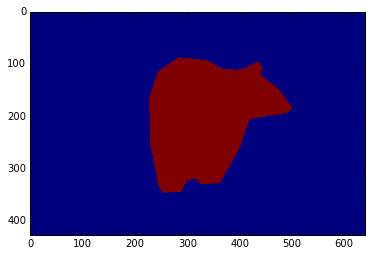

In [54]:
plt.imshow(np.squeeze(a))
np.squeeze(a).shape
plt